## Imports

In [66]:
from __future__ import print_function, division

import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error as MSE

## Reading and preparing the df

In [11]:
horsey = pd.read_csv('finalmerged_clean').drop('Unnamed: 0', axis=1)

#### Smaller data set (maiden females)

In [7]:
MaidenFems = horsey.iloc[42:49]
MaidenFems

,Horse Name,Final_Time,Final_Time_Hund,Gender,Firsts,Seconds,Starts,Thirds,PercentWin,Date,ThreeF,FourF,FiveF
42,Dhafeera,1:40.25,10025,1,0,2,5,0,0.400000,10,374.000000,494.000000,616.800000
43,Jazaalah,1:40.46,10046,1,0,0,4,2,0.500000,10,385.000000,481.000000,620.333333
44,Meal Ticket,1:40.58,10058,1,0,2,6,0,0.333333,37,370.000000,499.571429,620.166667
45,You Missed It,1:40.84,10084,1,0,5,7,1,0.857143,41,366.333333,492.363636,614.545455
46,Blossom Trail Miss,1:40.89,10089,1,0,0,3,1,0.333333,51,378.666667,500.923077,630.500000
47,Chalky,1:40.99,10099,1,0,2,5,1,0.600000,20,376.000000,504.500000,626.571429
48,Beauty Divine,1:41.75,10175,1,0,0,3,0,0.000000,27,389.333333,515.333333,624.000000


#### Larger data set (without maiden females)

In [12]:
horse_fast = horsey.drop(horsey.index[42:49]).reset_index(drop=True)
horse_fast

,Horse Name,Final_Time,Final_Time_Hund,Gender,Firsts,Seconds,Starts,Thirds,PercentWin,Date,ThreeF,FourF,FiveF
0,Blame the Rider,1:35.11,9511,0,0,0,5,1,0.200000,28,366.500000,490.000000,614.909091
1,Majestic Eagle,1:35.25,9525,0,0,2,4,0,0.500000,35,386.666667,506.714286,622.666667
2,Sellwood,1:35.39,9539,0,0,1,2,1,1.000000,28,365.333333,488.666667,619.333333
3,Cajun Treasure,1:35.39,9539,0,0,0,0,0,0.000000,18,366.500000,496.571429,618.000000
4,Friendly Outthedor,1:35.69,9569,0,0,1,4,0,0.250000,46,373.142857,493.666667,611.500000
5,Pointed,1:35.79,9579,0,0,0,5,0,0.000000,29,367.500000,490.750000,612.769231
6,Dignitaire,1:36.25,9625,0,0,0,3,1,0.333333,32,376.400000,498.571429,623.333333
7,Papa Joe,1:36.71,9671,0,0,0,1,0,0.000000,15,382.666667,503.111111,634.000000
8,Tule Fog,1:34.19,9419,0,1,1,6,1,0.500000,34,381.750000,492.333333,614.727273
9,Lymebyrd,1:34.83,9483,0,2,3,15,1,0.400000,44,369.000000,491.176471,608.421053


In [13]:
horse_fast = horse_fast.drop('Final_Time',1).drop('Horse Name',1)
horse_fast

,Final_Time_Hund,Gender,Firsts,Seconds,Starts,Thirds,PercentWin,Date,ThreeF,FourF,FiveF
0,9511,0,0,0,5,1,0.200000,28,366.500000,490.000000,614.909091
1,9525,0,0,2,4,0,0.500000,35,386.666667,506.714286,622.666667
2,9539,0,0,1,2,1,1.000000,28,365.333333,488.666667,619.333333
3,9539,0,0,0,0,0,0.000000,18,366.500000,496.571429,618.000000
4,9569,0,0,1,4,0,0.250000,46,373.142857,493.666667,611.500000
5,9579,0,0,0,5,0,0.000000,29,367.500000,490.750000,612.769231
6,9625,0,0,0,3,1,0.333333,32,376.400000,498.571429,623.333333
7,9671,0,0,0,1,0,0.000000,15,382.666667,503.111111,634.000000
8,9419,0,1,1,6,1,0.500000,34,381.750000,492.333333,614.727273
9,9483,0,2,3,15,1,0.400000,44,369.000000,491.176471,608.421053


## Splitting into Master Test-Train

In [38]:
ttest = horse_fast.iloc[[1,5,10,15,20,25,30,35,40,45,50]].reset_index(drop=True)

In [50]:
ttrain = horse_fast.drop(axis = 0, index = [1,5,10,15,20,25,30,35,40,45,50]).sample(frac=1).reset_index(drop=True)

In [51]:
ttrain

,Final_Time_Hund,Gender,Firsts,Seconds,Starts,Thirds,PercentWin,Date,ThreeF,FourF,FiveF
0,9545,0,1,3,9,1,0.555556,58,377.090909,498.250000,629.555556
1,9499,1,3,5,13,1,0.692308,61,383.142857,495.630435,619.200000
2,9452,1,2,4,11,0,0.545455,46,373.000000,494.588235,619.920000
3,9516,0,1,0,9,0,0.111111,39,373.428571,490.000000,610.800000
4,9617,0,1,1,4,0,0.500000,19,378.666667,498.571429,621.111111
5,9624,1,1,3,13,4,0.615385,33,365.333333,493.875000,621.285714
6,9548,0,4,3,20,3,0.500000,38,376.000000,488.666667,611.600000
7,9559,1,1,3,14,1,0.357143,45,379.333333,496.125000,620.833333
8,9468,1,4,7,18,2,0.722222,66,371.142857,493.473684,624.666667
9,9477,0,1,3,6,0,0.666667,30,371.333333,489.500000,612.000000


In [52]:
y_ttrain = ttrain['Final_Time_Hund'] 
y_ttest = ttest['Final_Time_Hund']    #extract dependent variable

X_ttrain = ttrain.drop('Final_Time_Hund',1)
X_ttest = ttest.drop('Final_Time_Hund',1) # Get rid of ind. variables

## Testing Assumptions

#### Assumption 1

In [68]:
XAssum = X_ttrain
yAssum = y_ttrain

In [69]:
XAssum_train, XAssum_test, yAssum_train, yAssum_test = train_test_split(XAssum, yAssum, test_size=0.2)

In [73]:
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(XAssum_train, yAssum_train)
    pred = rgr.predict(XAssum_test, yAssum_test)

#Regression plot
    plt.subplot(1, 3, 1)
    plt.scatter(XAssum_train,yAssum_train)
    plt.plot(XAssum_train, pred, color='blue',linewidth=1)
    plt.title("Regression fit")
    plt.xlabel("x")
    plt.ylabel("y")
    
    
#Residual plot (true minus predicted)
    plt.subplot(1, 3, 2)
    res = yAssum_train - pred
    plt.scatter(pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
#A Q-Q plot (for the scope of today), it's a percentile, percentile plot. When the predicted and actual distributions
#are the same, they Q-Q plot has a diagonal 45degree line. When stuff diverges, the kertosis between predicted and actual are different, 
#your line gets wonky. 
    plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")

diagnostic_plot(XAssum_train, yAssum_train)


modelA = ElasticNet(1, l1_ratio=.5)
fit = modelA.fit(XAssum_train, yAssum_train)
rsq = fit.score(XAssum_train, yAssum_train)
adj_rsq = 1 - (1-rsq)*(len(yAssum_train)-1)/(len(yAssum_train)-XAssum_train.shape[1]-1)

print(rsq)
print(adj_rsq)

TypeError: predict() takes 2 positional arguments but 3 were given

#### Assumption 2

In [75]:
# develop OLS with Sklearn
X = ttrain[1:]
y = ttrain[0]  # predictor

lr = LinearRegression()
fit = lr.fit(X,y)

t['predict']=fit.predict(X)
data['resid']=data.cnt-data.predict
with sns.axes_style('white'):
    plot=data.plot(kind='scatter',
                  x='predict',y='resid',alpha=0.2,figsize=(10,6))

NameError: name 'data' is not defined

## Linear Regression

## Model A - Elastic Net (no frills)

In [78]:
## Establishing x and y

XA = X_ttrain
yA = y_ttrain

In [79]:
#Checking the predictability of the model with this alpha = 1
modelA = ElasticNet(1, l1_ratio=.5)
fit = modelA.fit(XA, yA)
rsq = fit.score(XA, yA)
adj_rsq = 1 - (1-rsq)*(len(yA)-1)/(len(yA)-XA.shape[1]-1)

print(rsq)
print(adj_rsq)

0.30733402796483467
0.06848369278029498


** 0.3073 **  not great... but not terrible. 30% of the variance is explained by the model. 

In [80]:
#Let's see if I play around with the ratios of L1 and L2

modelA = ElasticNet(1, l1_ratio=.2)
fit = modelA.fit(XA, yA)
rsq = fit.score(XA, yA)
adj_rsq = 1 - (1-rsq)*(len(yA)-1)/(len(yA)-XA.shape[1]-1)

print(rsq)
print(adj_rsq)

0.2773051493067136
0.02810002837799408


** Looks slightly worse. I guess there wasn't much need to compress complexity, or fix colinearity. **

In [81]:
#Let's check it in the other direction, with L1 getting more weight.

modelA = ElasticNet(1, l1_ratio=.98)
fit = modelA.fit(XA, yA)
rsq = fit.score(XA, yA)
adj_rsq = 1 - (1-rsq)*(len(yA)-1)/(len(yA)-XA.shape[1]-1)

print(rsq)
print(adj_rsq)


0.41903203286967117
0.21869825110059227


** Seems like l1 of 0.98 really takes the cake! Let's check out alpha... Might be worth it to switch to a 
Lasso model... something to keep in mind**

In [83]:
#Let's see if we can find a better alpha...

kf = KFold(n_splits=5, shuffle = True, random_state = 40 )

alphas = [1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000, 100000, 1000000]
#alphas = [0,.001,.01,.1,.2,.5,.9,1,5,10,50,100,1000,10000]
errors = []
for i in alphas:
   err_list = []
   for train_index, test_index in kf.split(XA):
       #print("TRAIN:", train_index, "TEST:", test_index) #This gives the index of the rows you're training and testing. 
       XA_train, XA_test = XA.loc[train_index], XA.loc[test_index]
       yA_train, yA_test = yA[train_index], yA[test_index]
 
       ef = ElasticNet(i, l1_ratio = 0.5)
       ef.fit(XA_train,yA_train)
       #print(ef.coef_) #This prints the coefficients of each of the input variables. 
       preds = ef.predict(XA_test) #Predictions for the y value. 
       error = np.sqrt(MSE(preds,yA_test))
       err_list.append(error)
       
   error = np.mean(err_list)
   errors.append(error)
   print("The RMSE for alpha = {0} is {1}".format(i,error))

The RMSE for alpha = 1e-09 is 91.81676048874473
The RMSE for alpha = 1e-08 is 91.81675800679339
The RMSE for alpha = 1e-07 is 91.81673318723004
The RMSE for alpha = 1e-06 is 91.81648500108642
The RMSE for alpha = 1e-05 is 91.81400415413222
The RMSE for alpha = 0.0001 is 91.78929653852853
The RMSE for alpha = 0.001 is 91.551902291883
The RMSE for alpha = 0.01 is 89.8624774768642
The RMSE for alpha = 0.1 is 86.18239990702807
The RMSE for alpha = 1 is 86.22685788137451
The RMSE for alpha = 10 is 85.58936962368543
The RMSE for alpha = 100 is 80.68484780710189
The RMSE for alpha = 1000 is 79.81833497094951
The RMSE for alpha = 10000 is 79.81833497094951
The RMSE for alpha = 100000 is 79.81833497094951
The RMSE for alpha = 1000000 is 79.81833497094951


** Looks like the best alpha is around 1000! Lets see if we can get even more granular. **

In [85]:
kf = KFold(n_splits=5, shuffle = True, random_state = 40)

alphas = [500, 600, 800, 900, 1000, 1500, 2000, 3000]
#alphas = [0,.001,.01,.1,.2,.5,.9,1,5,10,50,100,1000,10000]
errors = []
for i in alphas:
   err_list = []
   for train_index, test_index in kf.split(XA):
       #print("TRAIN:", train_index, "TEST:", test_index) #This gives the index of the rows you're training and testing. 
       XA_train, XA_test = XA.loc[train_index], XA.loc[test_index]
       yA_train, yA_test = yA[train_index], yA[test_index]
 
       ef = ElasticNet(i)
       ef.fit(XA_train,yA_train)
       #print(ef.coef_) #This prints the coefficients of each of the input variables. 
       preds = ef.predict(XA_test) #Predictions for the y value. 
       error = np.sqrt(MSE(preds,yA_test))
       err_list.append(error)
       
   error = np.mean(err_list)
   errors.append(error)
   print("The RMSE for alpha = {0} is {1}".format(i,error))

The RMSE for alpha = 500 is 79.93218785178335
The RMSE for alpha = 600 is 79.86798894741898
The RMSE for alpha = 800 is 79.81833497094951
The RMSE for alpha = 900 is 79.81833497094951
The RMSE for alpha = 1000 is 79.81833497094951
The RMSE for alpha = 1500 is 79.81833497094951
The RMSE for alpha = 2000 is 79.81833497094951
The RMSE for alpha = 3000 is 79.81833497094951


** I'm going to settle on an alpha of 800 **

In [86]:
#Checking the predictability of the model again with the new alpha of 90. 
modelA = ElasticNet(alpha = 90)
fit = modelA.fit(XA, yA)
fit.score(XA, yA)

0.0687112853527897

Hm. Not really sure what that did, but definitely didn't work...

** Now let's do some tests **

In [88]:
#Testing the predictability of the model with this alpha = 0.5
XA_train, XA_test, yA_train, yA_test = train_test_split(XA, yA, test_size=0.2)

In [105]:
## Letting it do it's thing on it's own.
encvA = ElasticNetCV()
fitA = encvA.fit(XA_train, yA_train)


rsq = fitA.score(XA_test, yA_test)
adj_rsq = 1 - (1-rsq)*(len(yA)-1)/(len(yA)-XA.shape[1]-1)

preds = fitA.predict(XA_test)
mserror = np.sqrt(MSE(yA_test,preds))
print(rsq)
print(adj_rsq)
print(preds)
print(mserror)
print(encvA.alpha_)
print(encvA.l1_ratio_)


-0.8913995314168868
-1.543606266388227
[9530.5419565  9561.39370159 9561.7368267  9544.50676454 9394.77359902
 9547.12785149 9547.75632547 9597.75908865]
109.7168299058312
1.0115570663680546
0.5


Well... that r^2 is super wacky... but the mean squared error seems alright... 

** So... looks like the ElasticNetCV recommends an alpha of 47.6 and a split of 0.5 **

In [90]:
## L1 is 0.98

encvA2 = ElasticNetCV(l1_ratio = 0.98)
fitA2 = encvA2.fit(XA_train, yA_train)


rsq = fitA2.score(XA_test, yA_test)
adj_rsq = 1 - (1-rsq)*(len(yA)-1)/(len(yA)-XA.shape[1]-1)

preds = fitA2.predict(XA_test)
mserror = np.sqrt(MSE(preds,yA_test))
print(rsq)
print(adj_rsq)
print(preds)
print(mserror)
print(encvA2.alpha_)
print(encvA2.l1_ratio_)



-0.7699761779104741
-1.3803127909830515
[9530.22201358 9557.78660356 9568.12085351 9515.09437083 9408.69257225
 9539.52109345 9552.02503325 9592.0898741 ]
106.13663706955026
13.708083498640713
0.98


Still weird... 

In [91]:
## Trying some alphas... 

encvA3 = ElasticNetCV(alphas = [80,800,1000])
fitA3 = encvA3.fit(XA_train, yA_train)


rsq = fitA3.score(XA_test, yA_test)
adj_rsq = 1 - (1-rsq)*(len(yA)-1)/(len(yA)-XA.shape[1]-1)

preds = fitA3.predict(XA_test)
mserror = np.sqrt(MSE(preds,yA_test))
print(rsq)
print(adj_rsq)
print(preds)
print(mserror)
print(encvA3.alpha_)
print(encvA3.l1_ratio_)

-0.03034522766804737
-0.3856366854846154
[9531.84786531 9537.12219259 9555.26771165 9537.26522148 9522.40946291
 9540.5271364  9528.01989905 9550.6925083 ]
80.97910904887202
80
0.5


Still confused... 

In [ ]:
# Looking under the hood at the coefficients, this is with the alpha and L1 given from elasticCV. 

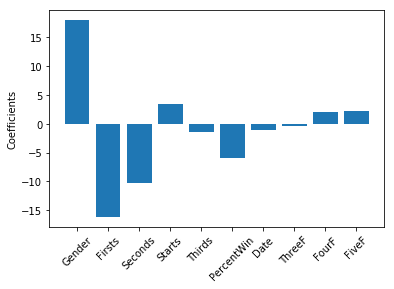

0.30733402796483467

In [94]:
elastic = ElasticNet()
elastic_coef = elastic.fit(XA, yA).coef_
_ = plt.bar(range(len(XA.columns)), elastic_coef)
_ = plt.xticks(range(len(XA.columns)), XA.columns, rotation=45)
_ = plt.ylabel('Coefficients')
plt.show()
elastic.score(XA,yA)

** Testing the predictability of the model on original T-T-S **

## Model B - Elastic Net (polynomial transformation)

In [95]:
## Establishing x and y

XB = X_ttrain
yB = y_ttrain

In [100]:
modelB = make_pipeline(PolynomialFeatures(2), ElasticNetCV(l1_ratio = .5))
fit = modelB.fit(XB, yB)
rsq = fit.score(XB, yB)
adj_rsq = 1 - (1-rsq)*(len(yA)-1)/(len(yB)-XB.shape[1]-1)

print(rsq)
print(adj_rsq)

0.1046036199894993
-0.2041537524279149


/Users/vicky/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [96]:
#Testing the predictability of the model with this alpha = 0.5
XB_train, XB_test, yB_train, yB_test = train_test_split(XB, yB, test_size=0.2)

In [103]:
modelB = make_pipeline(PolynomialFeatures(2), ElasticNetCV(l1_ratio = .5))
modelB.fit(XB_train, yB_train)
rsq = modelB.score(XB_train,yB_train)
adj_rsq = 1 - (1-rsq)*(len(yB_train)-1)/(len(yB_train)-XB_train.shape[1]-1)

preds = fitA3.predict(XB_test)
mserror = np.sqrt(MSE(preds,yB_test))
print(rsq)
print(adj_rsq)
print(preds)
print(mserror)
print(modelB.named_steps.elasticnetcv.alpha_)
print(modelB.named_steps.elasticnetcv.l1_ratio_)

0.24223454866587957
-0.11860614244560641
[9520.38536911 9535.49478345 9538.04112195 9537.26522148 9535.89628111
 9531.84786531 9534.06521828 9504.76352166]
75.95291917851185
36914.51228303739
0.5


/Users/vicky/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


## Model C - Elastic Net CV with transformations

In [106]:
XC = X_ttrain
yC = y_ttrain